<a href="https://colab.research.google.com/github/Dazco/Intro-to-machine-learning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tsdf
import numpy as np
import matplotlib.pyplot as plt
import math
import logging

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
datasets, info = tsdf.load('fashion_mnist', with_info=True, as_supervised=True)
train_dataset, test_dataset = datasets['train'], datasets['test']
train_num_examples, test_num_examples = info.splits['train'].num_examples, info.splits['test'].num_examples
print(train_num_examples, test_num_examples)

60000 10000


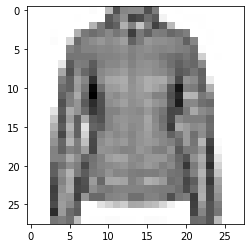

In [4]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

In [0]:
def normalize(image, label):
  image = tf.cast(image, dtype="float32")
  image /= 255
  return image, label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [0]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

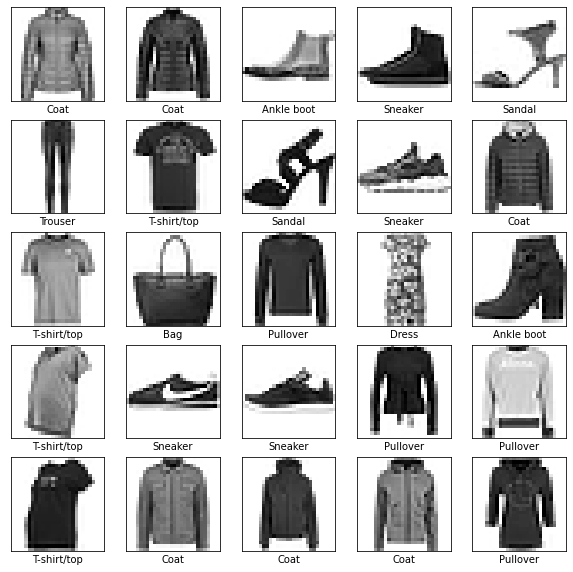

In [6]:
plt.figure(figsize=(10,10))
i = 0
for image, label in test_dataset.take(25):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(label_names[label])
  plt.imshow(image, cmap=plt.cm.binary)
  i += 1
plt.show()

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10)
])

In [0]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(train_num_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(train_num_examples/BATCH_SIZE))
print("Training done")

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6222 - accuracy: 0.7840
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4703 - accuracy: 0.8349
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4238 - accuracy: 0.8479
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4026 - accuracy: 0.8560
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3751 - accuracy: 0.8637
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3661 - accuracy: 0.8684
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3491 - accuracy: 0.8745
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3354 - accuracy: 0.8812
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3324 - accuracy: 0.8808
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.331

In [12]:
model.evaluate(test_dataset, steps=math.ceil(test_num_examples/BATCH_SIZE))

313/313 [==============================] - 1s 4ms/step - loss: 0.3993 - accuracy: 0.8676


[0.3992792069911957, 0.8676000237464905]

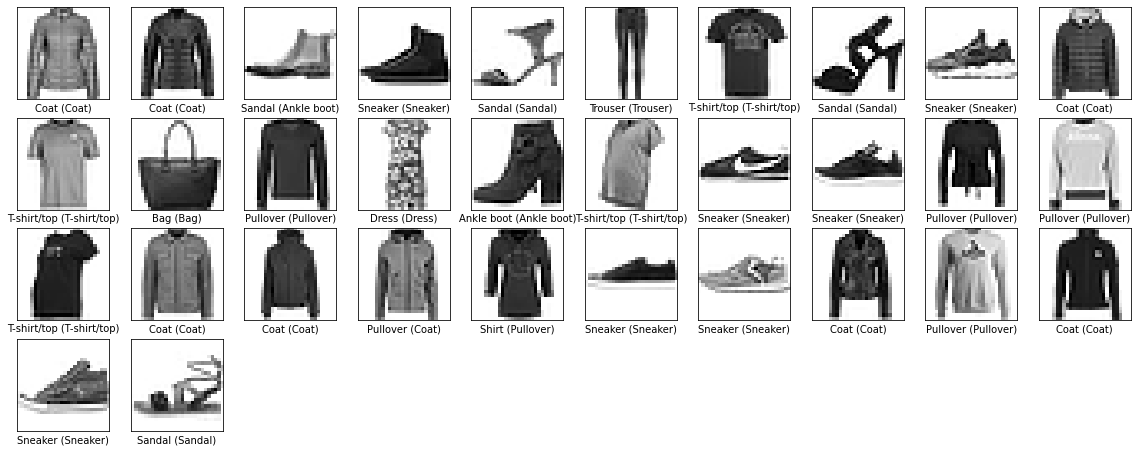

In [0]:
for images, labels in test_dataset.take(1):
  break
images = images.numpy()
predictions = model.predict(images)
plt.figure(figsize=(20,20))
i = 0
for image, label in zip(images, labels):
  predicted_label = label_names[np.argmax(predictions[i])]
  image = image.reshape((28,28))
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("{} ({})".format(predicted_label, label_names[label]))
  plt.imshow(image, cmap=plt.cm.binary)
  i += 1
plt.show()